In [55]:
import numpy as np
import pandas as pd
import matplotlib
import datetime
import time
from itertools import islice
import glob
import io
import seaborn as sns

In [56]:
#parsing one type of timestamps
def parse_timestamp(el):
    b = datetime.datetime.strptime(el, fmt)
    return b

In [57]:
#parsing another type
def parse_timestamp2(el):
    b = datetime.datetime.strptime(el, fmt2)
    return b

In [58]:
#for creating a new column that will contain just the date to use as joint column when mergining datasets by the date
def create_date_col(df_m):
    date_lst = []
    for index, row in df_m.iterrows():
        day = str(df_m['ride_begin'][index].day)
        month = str(df_m['ride_begin'][index].month)
        year = str(df_m['ride_begin'][index].year)
        date_text = year + '-' + month + '-' + day
        date_lst.append(date_text)
    return date_lst

In [59]:
fmt = '%Y-%m-%d'
fmt2 = '%Y-%m-%d %H:%M:%S'

In [60]:
# Importing data on countermeasures
url_c = "covid19_final_set.csv"
df_c = pd.read_csv(url_c, sep=';', low_memory=False)

In [62]:
mobility = glob.glob('./mobility_data/*.csv')
mobility.sort()

In [64]:
li = []
for file in mobility:
    frame = pd.read_csv(file, sep= ';', index_col=None, header=0, low_memory=False)
    li.append(frame) 
df_m = pd.concat(li, axis=0, ignore_index=True, sort= False) #connecting all the dates

In [65]:
pd.set_option('display.max_columns()', None)

In [66]:
df_c['date'] = df_c['date'].map(parse_timestamp)
df_m['ride_begin'] = df_m['ride_begin'].map(parse_timestamp2)
df_m['ride_end'] = df_m['ride_end'].map(parse_timestamp2)

In [67]:
df_m['date'] = create_date_col(df_m)

In [68]:
df_m['date'] = df_m['date'].map(parse_timestamp)

In [69]:
#droping all rows that are after the end of our analysis July 2021, infection numbers go until October
for index, row in df_c.iterrows():
    if (row['date'].year == 2021) and (row['date'].month > 7):
        df_c.drop(index, inplace=True)

In [71]:
#merging data frames
complete_df = pd.merge(df_m, df_c, on='date', how='outer')

### One day grouping for ride times and distances and further use of mean and median values for correlation analysis, count of rides in a day for correlation analysis

### Correlation of ride times

In [114]:
#daily mean of ride durations used for correlation analysis
rt_mean = df_m.groupby('date')['ride_time'].mean()

In [115]:
corr_df = pd.merge(rt_mean, df_c, on='date', how='left')

In [116]:
final_df = pd.DataFrame()
final_df['ride_time'] = corr_df['ride_time']
final_df['non-essential_retail'] = corr_df['non-essential_retail']
final_df['school_facilities'] = corr_df['school_facilities']
final_df['university_facilities'] = corr_df['university_facilities']
final_df['cultural_venues'] = corr_df['cultural_venues']
final_df['events_and_gatherings'] = corr_df['events_and_gatherings']
final_df['public_gatherings'] = corr_df['public_gatherings']
final_df['gastronomy'] = corr_df['gastronomy']
final_df['tourism'] = corr_df['tourism']
final_df['traveling'] = corr_df['traveling']
final_df['medical_facilities'] = corr_df['medical_facilities']
final_df['new_infections'] = corr_df['new_infections']


In [117]:
final_df.corr(method ='spearman')

,ride_time,non-essential_retail,school_facilities,university_facilities,cultural_venues,events_and_gatherings,public_gatherings,gastronomy,tourism,traveling,medical_facilities,new_infections
ride_time,1.000000,0.369763,0.563379,0.572521,0.309246,0.309246,0.563379,0.329913,0.312490,0.626600,0.563379,0.241947
non-essential_retail,0.369763,1.000000,0.909542,0.887034,0.942061,0.942061,0.909542,0.986263,0.904664,0.216687,0.909542,0.611437
school_facilities,0.563379,0.909542,1.000000,0.975254,0.807996,0.807996,1.000000,0.845908,0.790233,0.420290,1.000000,0.462525
university_facilities,0.572521,0.887034,0.975254,1.000000,0.794260,0.794260,0.975254,0.831528,0.778975,0.435751,0.975254,0.497229
cultural_venues,0.309246,0.942061,0.807996,0.794260,1.000000,1.000000,0.807996,0.955182,0.959201,0.218736,0.807996,0.518815
events_and_gatherings,0.309246,0.942061,0.807996,0.794260,1.000000,1.000000,0.807996,0.955182,0.959201,0.218736,0.807996,0.518815
public_gatherings,0.563379,0.909542,1.000000,0.975254,0.807996,0.807996,1.000000,0.845908,0.790233,0.420290,1.000000,0.462525
gastronomy,0.329913,0.986263,0.845908,0.831528,0.955182,0.955182,0.845908,1.000000,0.917264,0.228999,0.845908,0.675773
tourism,0.312490,0.904664,0.790233,0.778975,0.959201,0.959201,0.790233,0.917264,1.000000,0.256937,0.790233,0.474821
traveling,0.626600,0.216687,0.420290,0.435751,0.218736,0.218736,0.420290,0.228999,0.256937,1.000000,0.420290,0.294577


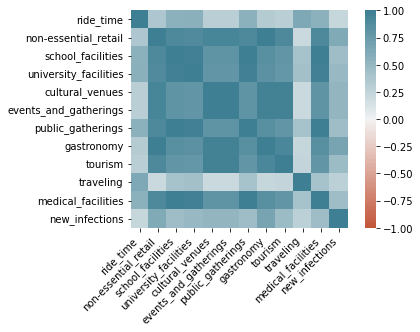

In [118]:
corr = final_df.corr(method ='spearman')
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

<AxesSubplot:>

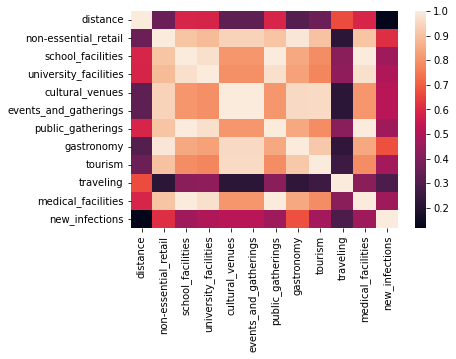

In [123]:
sns.heatmap(corr)


### Correlation of distances

In [120]:
#Mean of distances
dist_mean = df_m.groupby('date')['distance'].mean()
corr_df = pd.merge(dist_mean, df_c, on='date', how='left')

<AxesSubplot:>

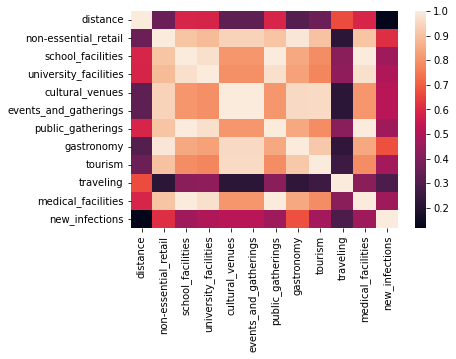

In [124]:
final_df = pd.DataFrame()
final_df['distance'] = corr_df['distance']
final_df['non-essential_retail'] = corr_df['non-essential_retail']
final_df['school_facilities'] = corr_df['school_facilities']
final_df['university_facilities'] = corr_df['university_facilities']
final_df['cultural_venues'] = corr_df['cultural_venues']
final_df['events_and_gatherings'] = corr_df['events_and_gatherings']
final_df['public_gatherings'] = corr_df['public_gatherings']
final_df['gastronomy'] = corr_df['gastronomy']
final_df['tourism'] = corr_df['tourism']
final_df['traveling'] = corr_df['traveling']
final_df['medical_facilities'] = corr_df['medical_facilities']
final_df['new_infections'] = corr_df['new_infections']


corr = final_df.corr(method ='spearman')
sns.heatmap(corr)
